In [1]:
import numpy as np
import matplotlib.pyplot as plt
import muram as mio
from astropy.io import fits
import pyflct


In [2]:
import datashader.transfer_functions as tf
import datashader as ds
from datashader.mpl_ext import dsshow
import pandas as pd
import holoviews as hv
from holoviews.operation.datashader import dynspread
from holoviews.operation.datashader import datashade
import hvplot

In [3]:
from matplotlib import font_manager
import matplotlib as mpl
font_path = '/home/mistflow/.fonts/cmunrm.ttf'  # Your font path goes here
#font_path = '/usr/share/fonts/opentype/urw-base35/NimbusRoman-Italic.otf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
mpl.rcParams["font.size"] = 14
mpl.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
#plt.rc('text', usetex=True)
plt.rc('axes', unicode_minus=False)
width, height = plt.rcParams.get('figure.figsize')

In [4]:
from scipy.stats import pearsonr
from scipy.ndimage import gaussian_filter
from scipy.stats import linregress
import seaborn as sns

In [5]:
def temporal_avg(data_in, start, end):
    tmp_avg = np.mean(data_in[start:end+1], axis = 0)
    return tmp_avg

In [6]:
def mean_v_from_file(file):
    v_x = fits.open(file)[0].data
    v_x.shape
    v_x = v_x[0:90]
    v_x = np.mean(v_x, axis=0)
    small = np.where(v_x < -6.5)
    v_x[small] = -6.5
    big = np.where(v_x > 6.5)
    v_x[big] = 6.5
    return v_x

def mean_vy_from_file(file):
    v_x = fits.open(file)[1].data
    v_x.shape
    v_x = v_x[0:90]
    v_x = np.mean(v_x, axis=0)
    small = np.where(v_x < -6.5)
    v_x[small] = -6.5
    big = np.where(v_x > 6.5)
    v_x[big] = 6.5
    return v_x

<h1>MURaM Velocities</h1>

In [7]:
Vxm1 = fits.open("Velocities_TAU_0_1.fits")[1].data # Vy from Velocities.fits as originally thought
Vym1 = fits.open("Velocities_TAU_0_1.fits")[0].data # Vx from Velocities.fits as originally thought
Vxm1 = Vxm1[::3,::2,::2]/1E5
Vym1 = Vym1[::3,::2,::2]/1E5
Vxm1 = Vxm1.transpose(0, 2, 1)
Vym1 = Vym1.transpose(0, 2, 1)

In [8]:
Vxm2 = fits.open("Velocities_TAU_0_010.fits")[1].data # Vy from Velocities.fits as originally thought
Vym2 = fits.open("Velocities_TAU_0_010.fits")[0].data # Vx from Velocities.fits as originally thought
Vxm2 = Vxm2[::3,::2,::2]/1E5
Vym2 = Vym2[::3,::2,::2]/1E5
Vxm2 = Vxm2.transpose(0, 2, 1)
Vym2 = Vym2.transpose(0, 2, 1)

In [9]:
Vxm1_mean = temporal_avg(Vxm1, 0, 90)
#Vxm1_mean = Vxm1_mean/1E5
Vym1_mean = temporal_avg(Vym1, 0, 90)
#Vym1_mean = Vym1_mean/1E5

In [10]:
Vxm1_filtered600 = gaussian_filter(Vxm1_mean, 22.5/2, mode = "wrap")
Vym1_filtered600 = gaussian_filter(Vym1_mean, 22.5/2, mode = "wrap")

In [11]:
Vxm1_filtered300 = gaussian_filter(Vxm1_mean, 11.25/2, mode = "wrap")
Vym1_filtered300 = gaussian_filter(Vym1_mean, 11.25/2, mode = "wrap")

In [12]:
Vxm2_mean = temporal_avg(Vxm2, 0, 90)
#Vxm2_mean = Vxm2_mean/1E5
Vym2_mean = temporal_avg(Vym2, 0, 90)
#Vym2_mean = Vym2_mean/1E5

In [13]:
Vxm2_filtered600 = gaussian_filter(Vxm2_mean, 22.5/2, mode = "wrap")
Vym2_filtered600 = gaussian_filter(Vym2_mean, 22.5/2, mode = "wrap")

In [14]:
Vxm2_filtered300 = gaussian_filter(Vxm2_mean, 11.25/2, mode = "wrap")
Vym2_filtered300 = gaussian_filter(Vym2_mean, 11.25/2, mode = "wrap")

In [15]:
Vxm3 = fits.open("Velocities_TAU_0_001.fits")[1].data # Vy from Velocities.fits as originally thought
Vym3 = fits.open("Velocities_TAU_0_001.fits")[0].data # Vx from Velocities.fits as originally thought
Vxm3 = Vxm3[::3,::2,::2]/1E5
Vym3 = Vym3[::3,::2,::2]/1E5
Vxm3 = Vxm3.transpose(0, 2, 1)
Vym3 = Vym3.transpose(0, 2, 1)

In [16]:
Vxm4 = fits.open("Velocities_TAU_0_0001.fits")[1].data # Vy from Velocities.fits as originally thought
Vym4 = fits.open("Velocities_TAU_0_0001.fits")[0].data # Vx from Velocities.fits as originally thought
Vxm4 = Vxm4[::3,::2,::2]/1E5
Vym4 = Vym4[::3,::2,::2]/1E5
Vxm4 = Vxm4.transpose(0, 2, 1)
Vym4 = Vym4.transpose(0, 2, 1)

In [17]:
Vxm3_mean = temporal_avg(Vxm3, 0, 90)
#Vxm1_mean = Vxm1_mean/1E5
Vym3_mean = temporal_avg(Vym3, 0, 90)
#Vym1_mean = Vym1_mean/1E5

In [18]:
Vxm4_mean = temporal_avg(Vxm4, 0, 90)
#Vxm1_mean = Vxm1_mean/1E5
Vym4_mean = temporal_avg(Vym4, 0, 90)
#Vym1_mean = Vym1_mean/1E5

In [19]:
Vxm3_filtered600 = gaussian_filter(Vxm3_mean, 22.5/2, mode = "wrap")
Vym3_filtered600 = gaussian_filter(Vym3_mean, 22.5/2, mode = "wrap")

In [20]:
Vxm3_filtered300 = gaussian_filter(Vxm3_mean, 11.25/2, mode = "wrap")
Vym3_filtered300 = gaussian_filter(Vym3_mean, 11.25/2, mode = "wrap")

In [21]:
Vxm4_filtered600 = gaussian_filter(Vxm4_mean, 22.5/2, mode = "wrap")
Vym4_filtered600 = gaussian_filter(Vym4_mean, 22.5/2, mode = "wrap")

In [22]:
Vxm4_filtered300 = gaussian_filter(Vxm4_mean, 11.25/2, mode = "wrap")
Vym4_filtered300 = gaussian_filter(Vym4_mean, 11.25/2, mode = "wrap")

<h1>Milne-Eddington Fe I</h1>

In [23]:
Vx_ME_FeI = fits.open("pyFLCT_vx_vy_fwhm_600_dt_30_Bz_FeI_tracked.fits")[0].data
Vy_ME_FeI = fits.open("pyFLCT_vx_vy_fwhm_600_dt_30_Bz_FeI_tracked.fits")[1].data

In [24]:
Vx_BzFeI_cor = mean_v_from_file("pyFLCT_vx_vy_fwhm_600_dt_30_Bz_FeI_tracked.fits")
Vy_BzFeI_cor = mean_vy_from_file("pyFLCT_vx_vy_fwhm_600_dt_30_Bz_FeI_tracked.fits")

In [25]:
Vx_ME3_FeI = fits.open("pyFLCT_vx_vy_fwhm_300_dt_30_Bz_FeI_tracked.fits")[0].data
Vy_ME3_FeI = fits.open("pyFLCT_vx_vy_fwhm_300_dt_30_Bz_FeI_tracked.fits")[1].data

In [26]:
Vx_BzFeI_cor3 = mean_v_from_file("pyFLCT_vx_vy_fwhm_300_dt_30_Bz_FeI_tracked.fits")
Vy_BzFeI_cor3 = mean_vy_from_file("pyFLCT_vx_vy_fwhm_300_dt_30_Bz_FeI_tracked.fits")

<h1>WFA Mg I b2</h1>

In [27]:
Vx_ME_MgI = fits.open("pyFLCT_vx_vy_fwhm_600_dt_30_Bz_WFA_Mg_tracked.fits")[0].data
Vy_ME_MgI = fits.open("pyFLCT_vx_vy_fwhm_600_dt_30_Bz_WFA_Mg_tracked.fits")[1].data

In [28]:
Vx_BzMgI_cor = mean_v_from_file("pyFLCT_vx_vy_fwhm_600_dt_30_Bz_WFA_Mg_tracked.fits")
Vy_BzMgI_cor = mean_vy_from_file("pyFLCT_vx_vy_fwhm_600_dt_30_Bz_WFA_Mg_tracked.fits")

In [29]:
Vx_ME3_MgI = fits.open("pyFLCT_vx_vy_fwhm_300_dt_30_Bz_WFA_Mg_tracked.fits")[0].data
Vy_ME3_MgI = fits.open("pyFLCT_vx_vy_fwhm_300_dt_30_Bz_WFA_Mg_tracked.fits")[1].data

In [30]:
Vx_BzMgI_cor3 = mean_v_from_file("pyFLCT_vx_vy_fwhm_300_dt_30_Bz_WFA_Mg_tracked.fits")
Vy_BzMgI_cor3 = mean_vy_from_file("pyFLCT_vx_vy_fwhm_300_dt_30_Bz_WFA_Mg_tracked.fits")

In [31]:
logt = [-1.0, -2.0, -3.0, -4.0]
fwhm6x_corM = [pearsonr(Vxm1_filtered600.flatten(), Vx_BzMgI_cor.flatten())[0],
            pearsonr(Vxm2_filtered600.flatten(), Vx_BzMgI_cor.flatten())[0],
             pearsonr(Vxm3_filtered600.flatten(), Vx_BzMgI_cor.flatten())[0],
             pearsonr(Vxm4_filtered600.flatten(), Vx_BzMgI_cor.flatten())[0]]

fwhm6y_corM = [pearsonr(Vym1_filtered600.flatten(), Vy_BzMgI_cor.flatten())[0],
            pearsonr(Vym2_filtered600.flatten(), Vy_BzMgI_cor.flatten())[0],
             pearsonr(Vym3_filtered600.flatten(), Vy_BzMgI_cor.flatten())[0],
             pearsonr(Vym4_filtered600.flatten(), Vy_BzMgI_cor.flatten())[0]]

fwhm3x_corM = [pearsonr(Vxm1_filtered300.flatten(), Vx_BzMgI_cor3.flatten())[0],
            pearsonr(Vxm2_filtered300.flatten(), Vx_BzMgI_cor3.flatten())[0],
             pearsonr(Vxm3_filtered300.flatten(), Vx_BzMgI_cor3.flatten())[0],
             pearsonr(Vxm4_filtered300.flatten(), Vx_BzMgI_cor3.flatten())[0]]

fwhm3y_corM = [pearsonr(Vym1_filtered300.flatten(), Vy_BzMgI_cor3.flatten())[0],
            pearsonr(Vym2_filtered300.flatten(), Vy_BzMgI_cor3.flatten())[0],
             pearsonr(Vym3_filtered300.flatten(), Vy_BzMgI_cor3.flatten())[0],
             pearsonr(Vym4_filtered300.flatten(), Vy_BzMgI_cor3.flatten())[0]]

fwhm6x_corF = [pearsonr(Vxm1_filtered600.flatten(), Vx_BzFeI_cor.flatten())[0],
            pearsonr(Vxm2_filtered600.flatten(), Vx_BzFeI_cor.flatten())[0],
             pearsonr(Vxm3_filtered600.flatten(), Vx_BzFeI_cor.flatten())[0],
             pearsonr(Vxm4_filtered600.flatten(), Vx_BzFeI_cor.flatten())[0]]
fwhm6y_corF = [pearsonr(Vym1_filtered600.flatten(), Vy_BzFeI_cor.flatten())[0],
            pearsonr(Vym2_filtered600.flatten(), Vy_BzFeI_cor.flatten())[0],
             pearsonr(Vym3_filtered600.flatten(), Vy_BzFeI_cor.flatten())[0],
             pearsonr(Vym4_filtered600.flatten(), Vy_BzFeI_cor.flatten())[0]]

fwhm3x_corF = [pearsonr(Vxm1_filtered300.flatten(), Vx_BzFeI_cor3.flatten())[0],
            pearsonr(Vxm2_filtered300.flatten(), Vx_BzFeI_cor3.flatten())[0],
             pearsonr(Vxm3_filtered300.flatten(), Vx_BzFeI_cor3.flatten())[0],
             pearsonr(Vxm4_filtered300.flatten(), Vx_BzFeI_cor3.flatten())[0]]

fwhm3y_corF = [pearsonr(Vym1_filtered300.flatten(), Vy_BzFeI_cor3.flatten())[0],
            pearsonr(Vym2_filtered300.flatten(), Vy_BzFeI_cor3.flatten())[0],
             pearsonr(Vym3_filtered300.flatten(), Vy_BzFeI_cor3.flatten())[0],
             pearsonr(Vym4_filtered300.flatten(), Vy_BzFeI_cor3.flatten())[0]]

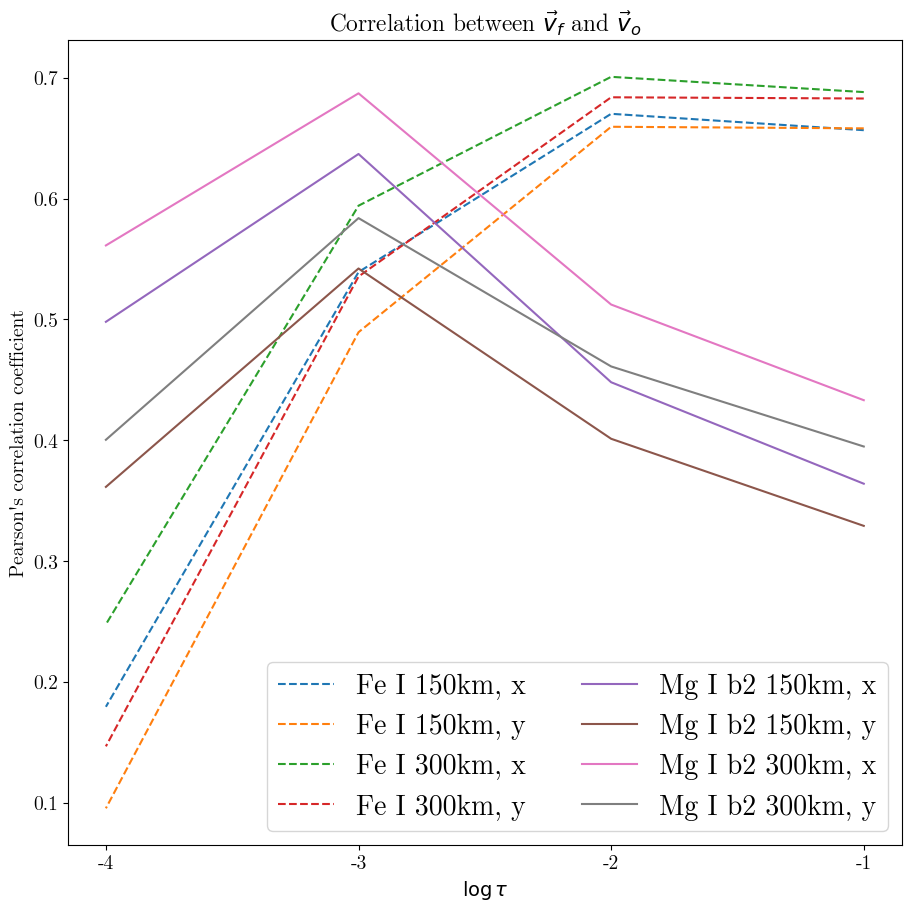

In [32]:
fig, ax = plt.subplots(figsize = (9, 9), layout='constrained')
ax.plot(logt, fwhm3x_corF, label="Fe I 150km, x", linestyle = "dashed")
ax.plot(logt, fwhm3y_corF, label = "Fe I 150km, y", linestyle = "dashed")
ax.plot(logt, fwhm6x_corF, label = "Fe I 300km, x", linestyle = "dashed")
ax.plot(logt, fwhm6y_corF, label = "Fe I 300km, y", linestyle = "dashed")
ax.plot(logt, fwhm3x_corM, label="Mg I b2 150km, x", linestyle = "solid")
ax.plot(logt, fwhm3y_corM, label = "Mg I b2 150km, y", linestyle = "solid")
ax.plot(logt, fwhm6x_corM, label = "Mg I b2 300km, x", linestyle = "solid")
ax.plot(logt, fwhm6y_corM, label = "Mg I b2 300km, y", linestyle = "solid")
ax.set_ylabel("Pearson's correlation coefficient")
ax.set_title('Correlation between $\\vec{v}_f$ and $\\vec{v}_o$')
ax.set_xlabel("$\log\\tau$")
ax.set_xticks([-1,-2,-3,-4])
#ax.axvline(-4, linewidth = 2, color = "red")
#ax.axvline(-1, linewidth = 2, color = "blue")
ax.legend(loc='best', ncols=2, fontsize = 20)
plt.savefig("Tables.png", dpi = 200, bbox_inches = 'tight')

In [33]:
print(fwhm6x_corF)

[0.6882519888655942, 0.7008815334729047, 0.5941931526112935, 0.24757903389940888]


<h2>04. 04. 2025</h2>

<h3>numpy Curl and Divergence</h3>

In [34]:
def numpy_divergence(f,h):
    """
    div(F) = dFx/dx + dFy/dy + ...
    g = np.gradient(Fx,dx, axis=1)+ np.gradient(Fy,dy, axis=0) #2D
    g = np.gradient(Fx,dx, axis=2)+ np.gradient(Fy,dy, axis=1) +np.gradient(Fz,dz,axis=0) #3D
    """
    num_dims = len(f)
    return np.ufunc.reduce(np.add, [np.gradient(f[i], h[i], axis=i) for i in range(num_dims)])

def numpy_curl(x,y,z,u,v,w):
    #dx = x[0,:,0]
    #dy = y[:,0,0]
    #dz = z[0,0,:]
    dx = x
    dy = y
    dz = z

    dummy, dFx_dy, dFx_dz = np.gradient (u, dx, dy, axis=[1,0])
    dFy_dx, dummy, dFy_dz = np.gradient (v, dx, dy, axis=[1,0])
    dFz_dx, dFz_dy, dummy = np.gradient (w, dx, dy, axis=[1,0])

    rot_x = dFz_dy - dFy_dz
    rot_y = dFx_dz - dFz_dx
    rot_z = dFy_dx - dFx_dy

    l = np.sqrt(np.power(u,2.0) + np.power(v,2.0) + np.power(w,2.0));

    m1 = np.multiply(rot_x,u)
    m2 = np.multiply(rot_y,v)
    m3 = np.multiply(rot_z,w)

    tmp1 = (m1 + m2 + m3)
    tmp2 = np.multiply(l,2.0)

    av = np.divide(tmp1, tmp2)

    return rot_x, rot_y, rot_z, av

In [35]:
def rotor(x,y,u,w):
    dx = x
    dy = y
    
    dFx_dy = np.gradient(u, dy, axis = 0)
    dFy_dx = np.gradient(w, dx, axis = 0)

    return dFy_dx - dFx_dy
   

In [36]:
x = np.linspace(np.min(Vxm1_filtered600.flatten()), np.max(Vxm1_filtered600.flatten()), len(Vxm1_filtered600.flatten()))
y = np.linspace(np.min(Vym1_filtered600.flatten()), np.max(Vym1_filtered600.flatten()), len(Vym1_filtered600.flatten()))
#a, b, c, tt = numpy_curl(x,y,None,Vxm1_filtered600, Vym1_filtered600, None)
#a = numpy_rotor(x,y,Vxm1_filtered600)
a = rotor(x,y,Vxm1_filtered600.flatten(), Vym1_filtered600.flatten())
print(a)
print(np.shape(a))

[14482.387 14546.295 14593.17  ... 13046.611 13640.574 13903.023]
(589824,)


In [37]:
np.shape(x)

(589824,)

In [38]:
np.shape(y)

(589824,)

In [39]:
len(Vxm1_filtered600.flatten())

589824

In [40]:
NY = len(Vym1_filtered600)
ymin = np.min(Vym1_filtered600)
ymax = np.max(Vym1_filtered600)
dy = (ymax -ymin )/(NY-1.)

NX = NY
xmin = np.min(Vxm1_filtered600)
xmax = np.max(Vxm1_filtered600)
dx = (xmax -xmin)/(NX-1.)

Fx  = Vxm1_filtered600
Fy  = Vym1_filtered600

F = [Fx, Fy]
h = [np.linspace(np.min(Vxm1_filtered600), np.max(Vxm1_filtered600), len(Vxm1_filtered600)), np.linspace(np.min(Vym1_filtered600), np.max(Vym1_filtered600), len(Vym1_filtered600))]
g1 = numpy_divergence(F,h)

NY = len(Vy_BzMgI_cor)
ymin = np.min(Vy_BzMgI_cor)
ymax = np.max(Vy_BzMgI_cor)
dy = (ymax -ymin )/(NY-1.)

NX = NY
xmin = np.min(Vx_BzMgI_cor)
xmax = np.max(Vx_BzMgI_cor)
dx = (xmax -xmin)/(NX-1.)

Fx  = Vx_BzMgI_cor
Fy  = Vy_BzMgI_cor

F = [Fx, Fy]
h = [np.linspace(np.min(Vx_BzMgI_cor), np.max(Vx_BzMgI_cor), len(Vx_BzMgI_cor)),np.linspace(np.min(Vy_BzMgI_cor), np.max(Vy_BzMgI_cor), len(Vx_BzMgI_cor))]
g11 = numpy_divergence(F,h)

div_600t1 = pearsonr(g1.flatten(), g11.flatten())
print(div_600t1)

PearsonRResult(statistic=0.12567942285787642, pvalue=0.0)


In [41]:
# rotor
NY = len(Vym1_filtered600)
ymin = np.min(Vym1_filtered600)
ymax = np.max(Vym1_filtered600)
dy = (ymax -ymin )/(NY-1.)

NX = NY
xmin = np.min(Vxm1_filtered600)
xmax = np.max(Vxm1_filtered600)
dx = (xmax -xmin)/(NX-1.)

g = rotor(dx, dy, Vxm1_filtered600, Vym1_filtered600)
print(g)

NY = len(Vy_BzFeI_cor)
ymin = np.min(Vy_BzFeI_cor)
ymax = np.max(Vy_BzFeI_cor)
dy = (ymax -ymin )/(NY-1.)

NX = NY
xmin = np.min(Vx_BzFeI_cor)
xmax = np.max(Vx_BzFeI_cor)
dx = (xmax -xmin)/(NX-1.)

gc = rotor(dx, dy, Vx_BzFeI_cor, Vy_BzFeI_cor)
print(gc)

curl600t1 = pearsonr(g.flatten(), gc.flatten())
print(curl600t1)

[[-8.008966  -8.071453  -8.050819  ... -7.311037  -7.6285863 -7.861512 ]
 [-7.9074984 -7.9897013 -7.9881043 ... -7.150276  -7.4872165 -7.7400403]
 [-7.702924  -7.8267283 -7.8655863 ... -6.821995  -7.1991796 -7.49351  ]
 ...
 [-8.798943  -8.762294  -8.649937  ... -8.418917  -8.629616  -8.755714 ]
 [-8.551354  -8.536947  -8.444373  ... -8.096075  -8.332609  -8.484022 ]
 [-8.433578  -8.431541  -8.350171  ... -7.937421  -8.18786   -8.353018 ]]
[[ 1.39941353 -0.39436061  0.57195756 ... -1.65656628 -1.18207855
  -0.80153132]
 [ 0.99644027  0.47699901  0.88850843 ... -1.12001576 -1.17210649
  -1.49278834]
 [ 2.04401511  0.71125813  0.96603853 ... -0.52694967 -0.71407917
  -1.19862719]
 ...
 [ 1.39811284  1.47602942  1.51381316 ...  1.22097051  1.22467869
   1.16831132]
 [ 1.10419724  1.2584932   1.4476202  ...  1.74129811  1.56721122
   1.50466867]
 [ 0.95451294  1.17706768  1.40111759 ...  2.06625374  1.76190423
   1.70318175]]
PearsonRResult(statistic=0.24163475152371847, pvalue=0.0)


In [42]:
x = np.linspace(np.min(Vxm1_filtered600.flatten()), np.max(Vxm1_filtered600.flatten()), len(Vxm1_filtered600.flatten()))
y = np.linspace(np.min(Vym1_filtered600.flatten()), np.max(Vym1_filtered600.flatten()), len(Vym1_filtered600.flatten()))

x1 = np.linspace(np.min(Vx_BzFeI_cor.flatten()), np.max(Vx_BzFeI_cor.flatten()), len(Vx_BzFeI_cor.flatten()))
y1 = np.linspace(np.min(Vy_BzFeI_cor), np.max(Vy_BzFeI_cor.flatten()), len(Vy_BzFeI_cor.flatten()))

g = rotor(x, y, Vxm1_filtered600.flatten(), Vym1_filtered600.flatten())
print(g)

gc = rotor(x1, y1, Vx_BzFeI_cor.flatten(), Vy_BzFeI_cor.flatten())
print(gc)

curl600t1 = pearsonr(g.flatten(), gc.flatten())
print(curl600t1)

[14482.387 14546.295 14593.17  ... 13046.611 13640.574 13903.023]
[1748.34198222 1124.42399796  602.43976598 ...  972.65106314 1103.43213827
  186.31918278]
PearsonRResult(statistic=0.24130327827805093, pvalue=0.0)


[[-8.008966  -8.071453  -8.050819  ... -7.311037  -7.6285863 -7.861512 ]
 [-7.9074984 -7.9897013 -7.9881043 ... -7.150276  -7.4872165 -7.7400403]
 [-7.702924  -7.8267283 -7.8655863 ... -6.821995  -7.1991796 -7.49351  ]
 ...
 [-8.798943  -8.762294  -8.649937  ... -8.418917  -8.629616  -8.755714 ]
 [-8.551354  -8.536947  -8.444373  ... -8.096075  -8.332609  -8.484022 ]
 [-8.433578  -8.431541  -8.350171  ... -7.937421  -8.18786   -8.353018 ]]
[[ 1.39941353 -0.39436061  0.57195756 ... -1.65656628 -1.18207855
  -0.80153132]
 [ 0.99644027  0.47699901  0.88850843 ... -1.12001576 -1.17210649
  -1.49278834]
 [ 2.04401511  0.71125813  0.96603853 ... -0.52694967 -0.71407917
  -1.19862719]
 ...
 [ 1.39811284  1.47602942  1.51381316 ...  1.22097051  1.22467869
   1.16831132]
 [ 1.10419724  1.2584932   1.4476202  ...  1.74129811  1.56721122
   1.50466867]
 [ 0.95451294  1.17706768  1.40111759 ...  2.06625374  1.76190423
   1.70318175]]


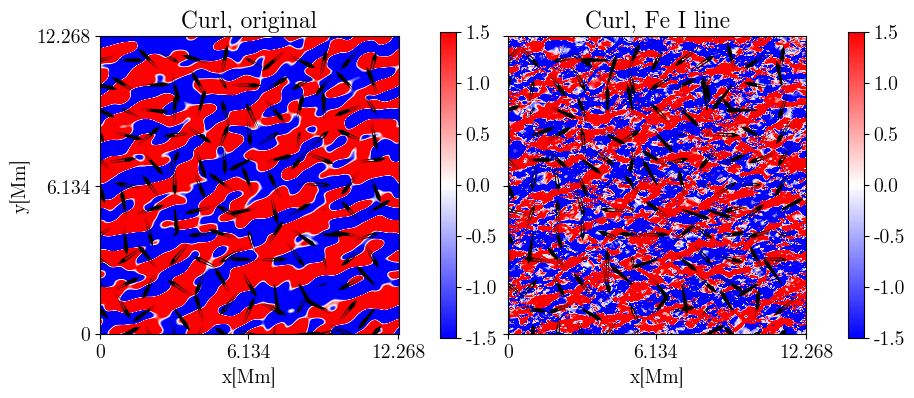

In [43]:

#--------------------------------------------------------
NY = len(Vym1_filtered600)
ymin = np.min(Vym1_filtered600)
ymax = np.max(Vym1_filtered600)
dy = (ymax -ymin )/(NY-1.)

NX = NY
xmin = np.min(Vxm1_filtered600)
xmax = np.max(Vxm1_filtered600)
dx = (xmax -xmin)/(NX-1.)

g = rotor(dx, dy, Vxm1_filtered600, Vym1_filtered600)
print(g)


#plt.figure(figsize=(cols*3.5,rows*3.5))
xmin = 0
xmax = 1536//2
ymin = 0
ymax=  1536//2



Bgtx_disp = Vxm1_filtered600[ymin:ymax,xmin:xmax]
Bgty_disp = Vym1_filtered600[ymin:ymax,xmin:xmax]
Bgtz_disp = g[ymin:ymax,xmin:xmax]

ysize,xsize = np.shape(Bgtx_disp)

stride = 64


xmaxind = int(round(xsize/stride))
ymaxind = int(round(ysize/stride))
xstr, ystr = np.meshgrid(stride*np.arange(0,xmaxind),stride*np.arange(0,ymaxind))

rows = 2
cols = 2
f = plt.figure(constrained_layout=True, figsize=(cols*4.5,rows*3.5))


ax4 = f.add_subplot(223)
im4 = ax4.imshow(Bgtz_disp, origin = 'lower', cmap = "bwr", vmin = -1.5, vmax = 1.5)
ax4.set_title("Curl, original")
ax4.set_xlabel("x[Mm]")
ax4.set_ylabel("y[Mm]")
ax4.set_xticks([0,380,767], [0, 6.134,12.268])
ax4.set_yticks([0,380,767], [0, 6.134,12.268])
#ax4.set_yticklabels([])
ax4.quiver(xstr,ystr,Bgtx_disp[::stride,::stride],Bgty_disp[::stride,::stride], headwidth = 3, headaxislength = 20, headlength = 4)
plt.colorbar(im4)


NY = len(Vy_BzFeI_cor)
ymin = np.min(Vy_BzFeI_cor)
ymax = np.max(Vy_BzFeI_cor)
dy = (ymax -ymin )/(NY-1.)

NX = NY
xmin = np.min(Vx_BzFeI_cor)
xmax = np.max(Vx_BzFeI_cor)
dx = (xmax -xmin)/(NX-1.)

gc = rotor(dx, dy, Vx_BzFeI_cor, Vy_BzFeI_cor)
print(gc)

xmin = 0
xmax = 768
ymin = 0
ymax=  768



Bgtx_disp = Vx_BzFeI_cor[ymin:ymax,xmin:xmax]
Bgty_disp = Vy_BzFeI_cor[ymin:ymax,xmin:xmax]
Bgtz_disp = gc[ymin:ymax,xmin:xmax]

ysize,xsize = np.shape(Bgtx_disp)

stride = 64


xmaxind = int(round(xsize/stride))
ymaxind = int(round(ysize/stride))
xstr, ystr = np.meshgrid(stride*np.arange(0,xmaxind),stride*np.arange(0,ymaxind))

ax3 = f.add_subplot(224)
im3 = ax3.imshow(Bgtz_disp, origin = 'lower', cmap = "bwr", vmin = -1.5, vmax = 1.5)
ax3.set_title("Curl, Fe I line")
ax3.set_xlabel("x[Mm]")
#ax2.set_ylabel("y[Mm]")
ax3.set_xticks([0,380,767], [0, 6.134,12.268])
ax3.set_yticks([0,380,767], [0, 6.134,12.268])
ax3.set_yticklabels([])
ax3.quiver(xstr,ystr,Bgtx_disp[::stride,::stride],Bgty_disp[::stride,::stride], headwidth = 3, headaxislength = 20, headlength = 4)
plt.colorbar(im3)



#plt.savefig("300_600B_div.png", dpi = 100, bbox_inches = 'tight')

<h3>Sympy Curl and Divergence</h3>

In [44]:
from sympy.vector import CoordSys3D, Del, divergence, curl

In [45]:
from sympy.physics.vector import ReferenceFrame, CoordinateSym, divergence

In [46]:
%%time
A = ReferenceFrame('A')
R = CoordSys3D('R')
#v = Vxm1_filtered600.flatten()*R.i + Vym1_filtered600.flatten()*R.j 

F = A[1]**2 * A[2] * A.x - A[0]*A[1] * A.y + A[2]**2 * A.z

G = curl(F, A)  

CPU times: user 9.16 ms, sys: 0 ns, total: 9.16 ms
Wall time: 8.79 ms


In [47]:
%%time
#v = Vxm1_filtered600.flatten()*R.i + Vym1_filtered600.flatten()*R.j + 0*R.k

CPU times: user 6 μs, sys: 4 μs, total: 10 μs
Wall time: 18.6 μs


In [48]:
print(v)

NameError: name 'v' is not defined

In [ ]:
%%time
#TauM1 = curl(v, R)

In [ ]:
np.shape(v)